In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score, classification_report, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
emp_train_data = pd.read_csv('train.csv')
emp_train_data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
emp_train_data.shape

(32769, 10)

In [4]:
emp_train_data.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [10]:
emp_train_data.nunique()

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [9]:
len(emp_train_data[emp_train_data['ACTION']==1])/len(emp_train_data), len(emp_train_data[emp_train_data['ACTION']==0])/len(emp_train_data)

(0.9421099209618847, 0.05789007903811529)

<AxesSubplot:xlabel='ACTION', ylabel='count'>

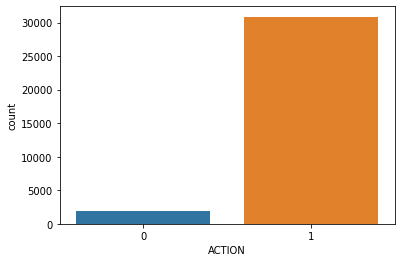

In [13]:
sns.countplot(emp_train_data['ACTION'])

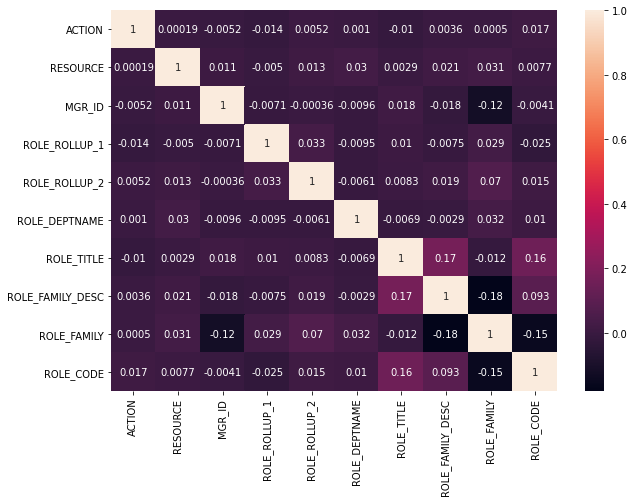

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(emp_train_data.corr(), annot=True)
plt.show()

In [16]:
X = emp_train_data.drop('ACTION', axis=1)
y = emp_train_data['ACTION']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [17]:
logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
y_train_predict = logit_reg.predict(X_test)

In [35]:
cm = confusion_matrix(y_test,y_train_predict)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test, y_train_predict).ravel()
tn, fp, fn, tp

[[   0  549]
 [   0 9282]]


(0, 549, 0, 9282)

In [23]:
def calculate_conf_matrix_values(y_test, y_predict):
    tp, fp, fn, tn = 0,0,0,0
    y_test_array = y_test.to_numpy()
    for i in range(len(y_test)):
        if (y_test.iloc[i] == 1 and y_predict[i] == 1):
            tp+=1
        elif (y_test.iloc[i] == 0 and y_predict[i] == 1):
            fp+=1
        elif (y_test.iloc[i] == 1 and y_predict[i] == 0):
            fn+=1
        else:
            tn+=1
    return tp, fp, fn, tn

In [25]:
tp, fp, fn, tn = calculate_conf_matrix_values(y_test, y_train_predict)
print('TP: {}'.format(tp)+' FP: {}'.format(fp)+ ' FN: {}'.format(fn)+ ' TN: {}'.format(tn))

TP: 9282 FP: 549 FN: 0 TN: 0


In [26]:
def rearrange_conf_matrix(con_matrix):
    temp = con_matrix.copy()
    for i in range(len(con_matrix)):
        for j in range(len(con_matrix)):
            if i==j:
                if i==0:
                    con_matrix[i][j] = temp[1][1]
                else:
                    con_matrix[i][j] = temp[0][0]
    return con_matrix
cm = rearrange_conf_matrix(cm)
cm

array([[9282,  549],
       [   0,    0]])

In [28]:
print(classification_report(y_test, y_train_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       549
           1       0.94      1.00      0.97      9282

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831



In [36]:
print('Accuracy Score {}'.format(accuracy_score(y_test, y_train_predict)))

Accuracy Score 0.9441562404638388


In [39]:
print('Recall Score {}'.format(recall_score(y_test, y_train_predict)))
print('Recall Score {}'.format(tp/(tp+fn)))

Recall Score 1.0
Recall Score 1.0


In [40]:
print('Precession Score {}'.format(precision_score(y_test, y_train_predict)))
print('Precession Score {}'.format(tp/(tp+fp)))

Precession Score 0.9441562404638388
Precession Score 0.9441562404638388


[0. 1.]
[0. 1.]
[2 1]


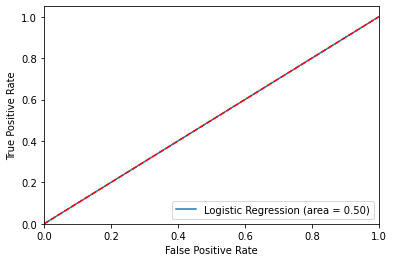

In [42]:
#ROC Graph
def plot_roc_curve(fpr, tpr,  model_roc_auc):
    plt.figure()
    plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
model_roc_auc = roc_auc_score(y_test, y_train_predict)
fpr, tpr, threshold = roc_curve(y_test, y_train_predict)
print(fpr)
print(tpr)
print(threshold)
plot_roc_curve(fpr, tpr, model_roc_auc)

In [43]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
